In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image
from tqdm import tqdm

In [2]:
ncore = mp.cpu_count()
ncore

48

In [3]:
# need to change
ipts="26647"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
# scan_type = 'processed_data'
scan_type = 'analysis'
# scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2021_05_26_DOE_print',
 '2022_04_15_Monalisa',
 '2022_04_22_Monalisa_G0',
 '2022_04_22_Monalisa_G0_no_loop',
 '2022_04_23_Monalisa_G1_loop_400nm',
 '2022_04_24_Monalisa_G0_loop_12steps',
 '2022_04_24_Monalisa_G0_loop_14steps',
 '2022_04_25_Monalisa_G0_loop_14steps_16mm',
 '2022_04_25_Monalisa_G1_loop_400nm_16mm',
 '2022_04_26_Coin_French',
 '2022_04_26_Coin_US',
 '2022_04_26_Ti64',
 '2022_04_26_bent_screws',
 '2022_04_26_quartz_tube',
 '2022_04_27_AM_gradient',
 '2022_04_27_Ti64_pores',
 '2022_04_27_Ti64_stepping',
 '2022_04_27_electrodes_Han',
 '2022_04_27_electrodes_Nelson',
 '2022_04_28_DOE_angles',
 '2022_04_28_paper',
 '2022_04_28_polymer',
 '2022_04_29_DOE_CT_DFI-1.png',
 '2022_04_29_DOE_CT_DFI.avi',
 '2022_04_29_DOE_CT_DFI.gif',
 '2022_04_29_DOE_CT_TI-1.png',
 '2022_04_29_DOE_CT_TI.avi',
 '2022_04_29_DOE_CT_TI.gif',
 '2022_04_29_DOE_angles',
 '2022_04_29_Monalisa_angles',
 '2022_04_29_Monalisa_angles_DFI.gif',
 '2022_04_29_Monalisa_angles_TI.gif',
 '2022_04_29_concrete',
 '202

In [17]:
sample_name = "2023_05_29_battery_parts2_SCALED_ROTATION"
name_pattern = ["TI_ACL", "DFI_ACL", "DPC_ACL", "AI_ACL", "DFI_over_AI"]
reverse = False
# ref_name = name_pattern[0]
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
# fname_list = rocku.filter_list(fname_list, name_pattern[1])
# fname_list
fname_dict = {}
acl_list = []
for e_pa in name_pattern:
    _fname_list = rocku.filter_list(fname_list, e_pa + '_0')
    _fname_list.sort(reverse=reverse)
    fname_dict[e_pa] = _fname_list
for each in fname_dict[name_pattern[0]]:
    _n = each.split('.')[0]
    _num = int(_n.split('_')[-1].replace('nm', ''))
    acl_list.append(_num)
fname_dict
# ######################
# fname_dict_out = {}
# acl_list = []
# pos_max = max(pos_list)
# for e_pos in pos_list:
#     _acl_nm = int(1000*wavelen_ang*((pos_max-e_pos)/10 + distance_to_G2_cm)/period_um)
#     acl_list.append("{:04d}".format(_acl_nm) + "nm")
# for e_pa in name_pattern:
#     _fname_list_out = []
#     for e_acl in acl_list:
#         _fname_list_out.append("_".join([e_pa, e_acl]))
#     fname_dict_out[e_pa] = _fname_list_out
# for ea_pa in name_pattern:
#     print(ea_pa)
#     for m, ea_file in enumerate(fname_dict[ea_pa]):
#         print("'{}' converted to '{}'".format(ea_file, fname_dict_out[ea_pa][m]))

{'TI_ACL': ['TI_ACL_0044nm.tiff',
  'TI_ACL_0066nm.tiff',
  'TI_ACL_0088nm.tiff',
  'TI_ACL_0110nm.tiff',
  'TI_ACL_0132nm.tiff',
  'TI_ACL_0154nm.tiff',
  'TI_ACL_0176nm.tiff',
  'TI_ACL_0199nm.tiff',
  'TI_ACL_0221nm.tiff',
  'TI_ACL_0243nm.tiff',
  'TI_ACL_0265nm.tiff',
  'TI_ACL_0287nm.tiff',
  'TI_ACL_0309nm.tiff',
  'TI_ACL_0331nm.tiff',
  'TI_ACL_0353nm.tiff',
  'TI_ACL_0376nm.tiff',
  'TI_ACL_0398nm.tiff',
  'TI_ACL_0420nm.tiff',
  'TI_ACL_0442nm.tiff',
  'TI_ACL_0464nm.tiff',
  'TI_ACL_0486nm.tiff',
  'TI_ACL_0508nm.tiff',
  'TI_ACL_0530nm.tiff',
  'TI_ACL_0553nm.tiff',
  'TI_ACL_0575nm.tiff',
  'TI_ACL_0597nm.tiff',
  'TI_ACL_0619nm.tiff',
  'TI_ACL_0641nm.tiff',
  'TI_ACL_0663nm.tiff',
  'TI_ACL_0685nm.tiff',
  'TI_ACL_0707nm.tiff',
  'TI_ACL_0730nm.tiff',
  'TI_ACL_0752nm.tiff',
  'TI_ACL_0774nm.tiff',
  'TI_ACL_0796nm.tiff'],
 'DFI_ACL': ['DFI_ACL_0044nm.tiff',
  'DFI_ACL_0066nm.tiff',
  'DFI_ACL_0088nm.tiff',
  'DFI_ACL_0110nm.tiff',
  'DFI_ACL_0132nm.tiff',
  'DFI_ACL_01

In [18]:
img_stack_dict = {}
for e_pa in name_pattern:
    print("Loading {} ...".format(e_pa))
    _img_stack = rocku.read_img_stack(scan_dir, fname_dict[e_pa], flipud=False)
    img_stack_dict[e_pa] = _img_stack.astype(np.float32)

Loading TI_ACL ...


35it [00:01, 24.56it/s]


Loading DFI_ACL ...


35it [00:01, 23.90it/s]


Loading DPC_ACL ...


35it [00:01, 24.84it/s]


Loading AI_ACL ...


35it [00:01, 23.24it/s]


Loading DFI_over_AI ...


35it [00:01, 23.99it/s]


Text(0.5, 1.0, 'last image')

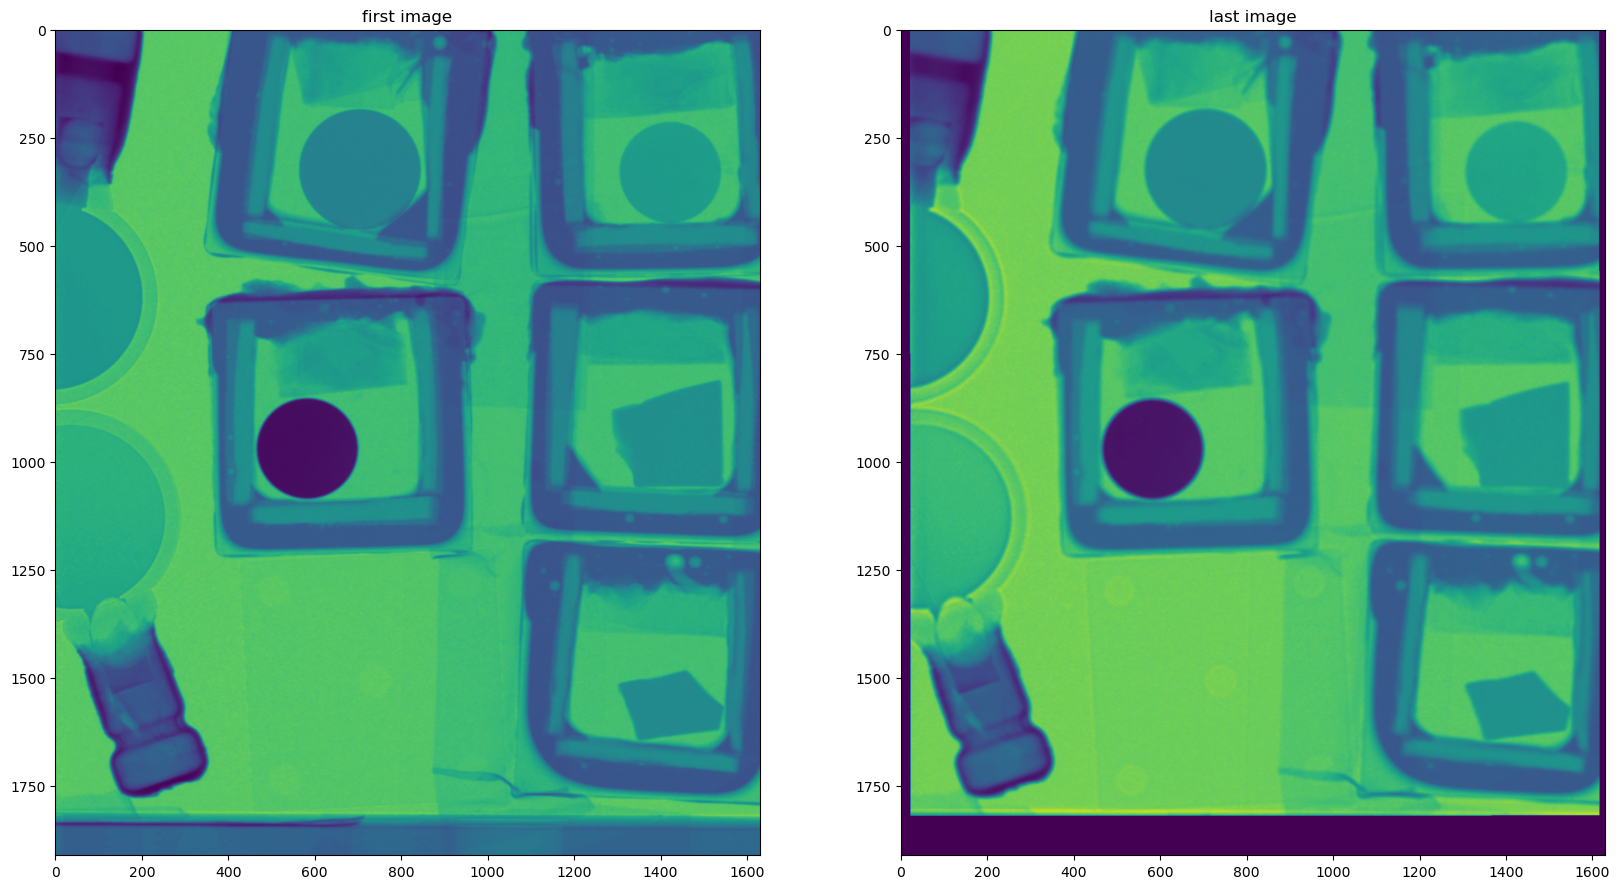

In [21]:
# img_min = np.min(unreg_dict[name_pattern[0]], axis=0)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img_stack_dict[name_pattern[0]][0])
ax[0].set_title('first image')

ax[1].imshow(img_stack_dict[name_pattern[0]][-1])
ax[1].set_title('last image')

# ax[2].imshow(img_min)
# ax[2].set_title('np.min')

In [22]:
###################### need to change start
crop = True
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 250
crop_right = 1900
crop_top = 100
crop_bottom = 2047
###################### need to change end
# proj_crop = rocku.crop(proj_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
first_crop = rocku.crop(unreg_dict[ref_name][0], crop_left, crop_right, crop_top, crop_bottom, crop)
last_crop = rocku.crop(unreg_dict[ref_name][-1], crop_left, crop_right, crop_top, crop_bottom, crop)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(first_crop)
ax[0].set_title('first image')

ax[1].imshow(last_crop)
ax[1].set_title('last image')

NameError: name 'unreg_dict' is not defined

In [72]:
for ea_pa in unreg_dict.keys():
    unreg_dict[ea_pa] = rocku.crop(unreg_dict[ea_pa], crop_left, crop_right, crop_top, crop_bottom, crop)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

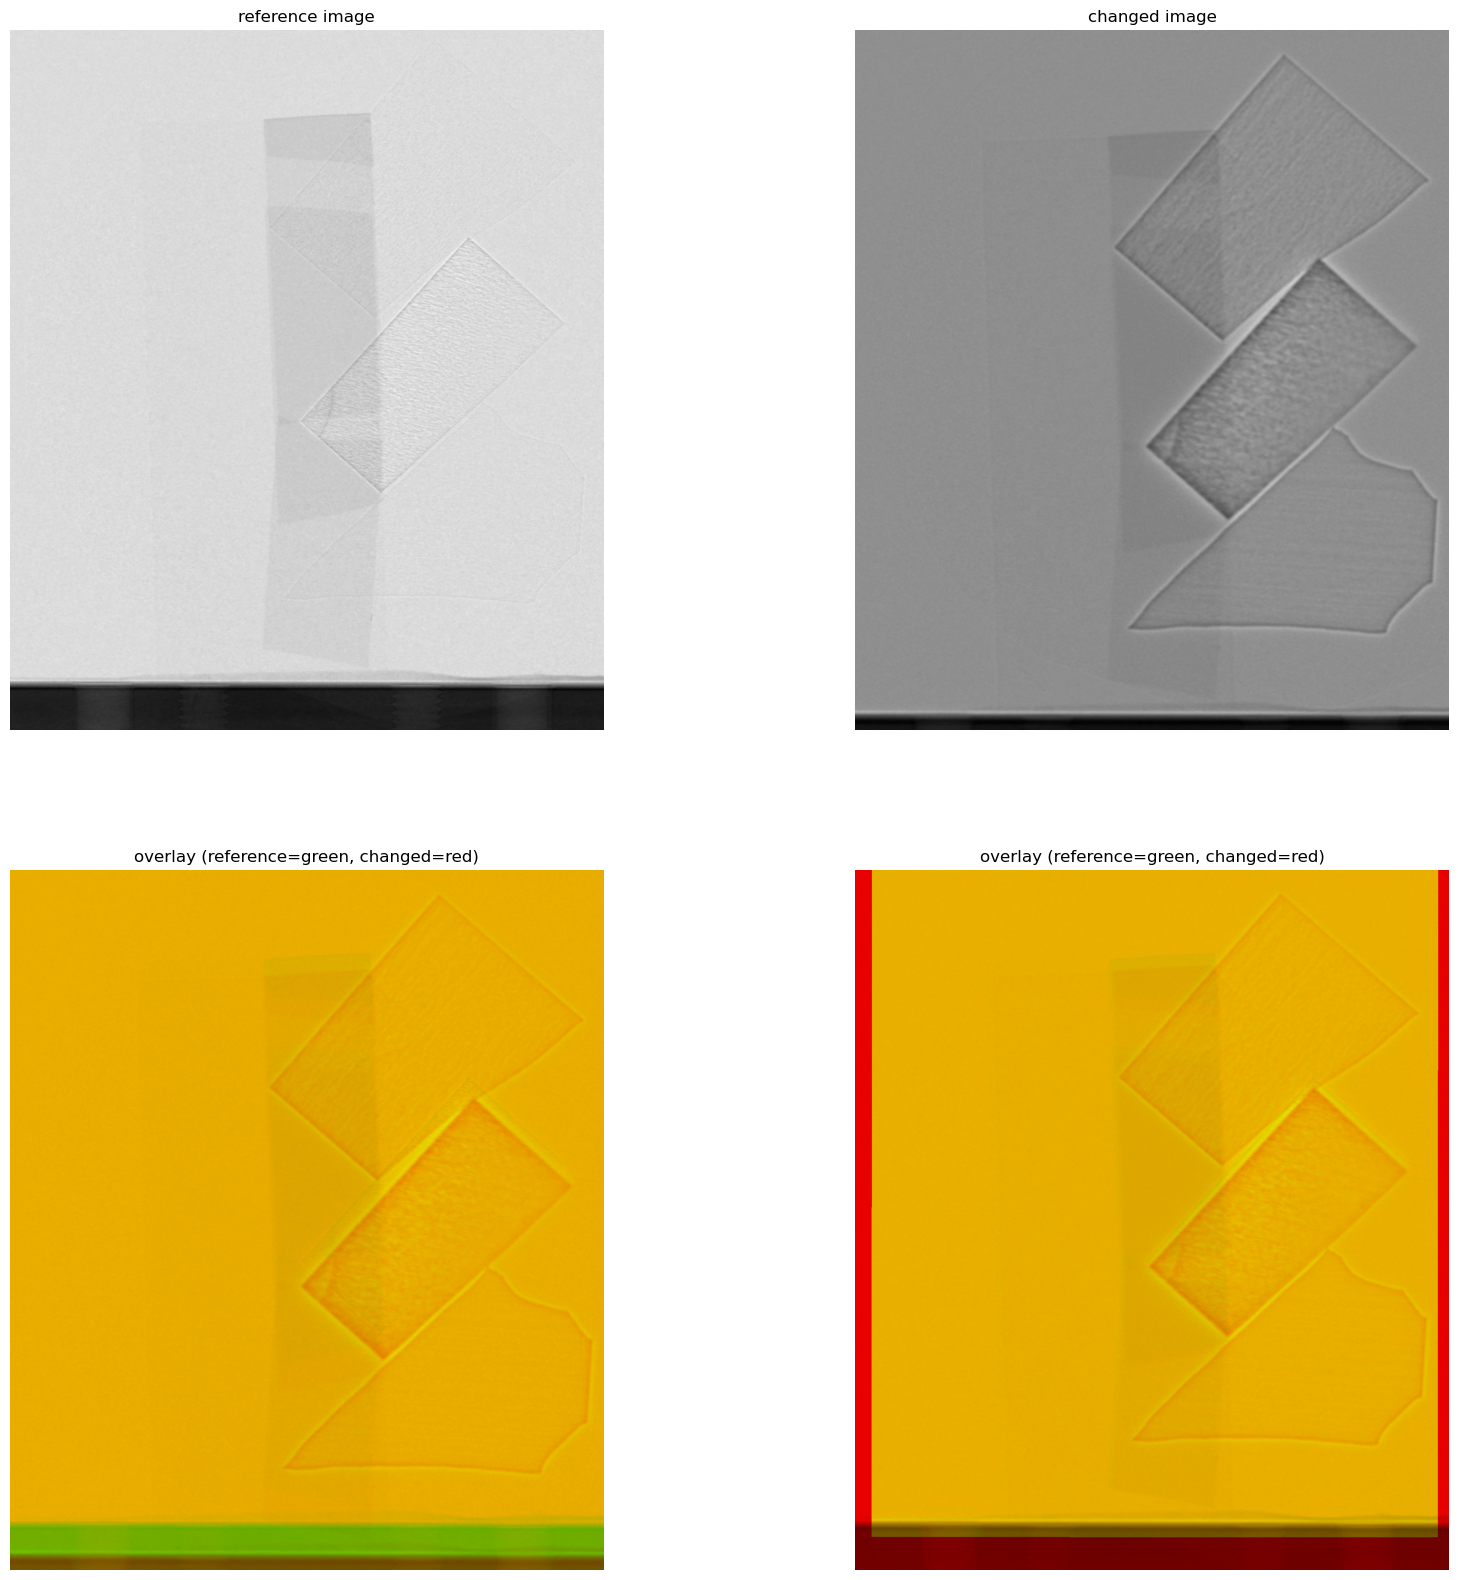

In [73]:
trans_algo = "SCALED_ROTATION"
#########################
#load reference and "moved" image
ref = unreg_dict[ref_name][0]
mov = unreg_dict[ref_name][-1]
#########################
sr = StackReg(trans_algo_dict[trans_algo])
reg = sr.register_transform(ref, mov)
reg = reg.clip(min=0)
after_reg = rocku.composite_images([ref, reg])
before_reg = rocku.composite_images([ref, mov])

f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0][0].imshow(ref, cmap='gray')
ax[0][0].set_title('reference image')
ax[0][0].axis('off')

ax[0][1].imshow(mov, cmap='gray')
ax[0][1].set_title('changed image')
ax[0][1].axis('off')

ax[1][0].imshow(before_reg)
ax[1][0].set_title('overlay (reference=green, changed=red)')
ax[1][0].axis('off');

ax[1][1].imshow(after_reg)
ax[1][1].set_title('overlay (reference=green, changed=red)')
ax[1][1].axis('off');

In [74]:
sr = StackReg(trans_algo_dict[trans_algo])
size = (unreg_dict[ref_name].shape[0], unreg_dict[ref_name].shape[1], unreg_dict[ref_name].shape[2])
reg_dict = {}
for e_pa in unreg_dict.keys():
    reg_dict[e_pa] = np.empty(size, dtype=unreg_dict[e_pa].dtype)
    reg_dict[e_pa][0] = unreg_dict[e_pa][0][:]
for idx in range(size[0]):
    if idx != 0:
        print("Registering {}".format(fname_dict[ref_name][idx]))
        _reg = sr.register_transform(unreg_dict[ref_name][0], unreg_dict[ref_name][idx])
        _reg = _reg.clip(min=0)
        reg_dict[ref_name][idx] = _reg[:]
        for ee in unreg_dict.keys():
            if ee != ref_name:
                print("Apply transform to {}".format(fname_dict[ee][idx]))
                _reg_trans = sr.transform(unreg_dict[ee][idx])
                reg_dict[ee][idx] = _reg_trans[:]

Registering TI_ACL_192.fits
Apply transform to DFI_ACL_192.fits
Apply transform to DPC_ACL_192.fits
Registering TI_ACL_187.fits
Apply transform to DFI_ACL_187.fits
Apply transform to DPC_ACL_187.fits
Registering TI_ACL_182.fits
Apply transform to DFI_ACL_182.fits
Apply transform to DPC_ACL_182.fits
Registering TI_ACL_177.fits
Apply transform to DFI_ACL_177.fits
Apply transform to DPC_ACL_177.fits
Registering TI_ACL_172.fits
Apply transform to DFI_ACL_172.fits
Apply transform to DPC_ACL_172.fits
Registering TI_ACL_167.fits
Apply transform to DFI_ACL_167.fits
Apply transform to DPC_ACL_167.fits
Registering TI_ACL_162.fits
Apply transform to DFI_ACL_162.fits
Apply transform to DPC_ACL_162.fits
Registering TI_ACL_157.fits
Apply transform to DFI_ACL_157.fits
Apply transform to DPC_ACL_157.fits
Registering TI_ACL_152.fits
Apply transform to DFI_ACL_152.fits
Apply transform to DPC_ACL_152.fits
Registering TI_ACL_147.fits
Apply transform to DFI_ACL_147.fits
Apply transform to DPC_ACL_147.fits


In [75]:
reg_dict["AI_ACL"] = 1 - reg_dict["TI_ACL"]
# reg_dict["AI_ACL"] = reg_dict["AI_ACL"].clip(max=10)
reg_dict["DFI_over_AI_ACL"] = np.true_divide(reg_dict["DFI_ACL"], reg_dict["AI_ACL"])
reg_dict["DFI_over_AI_ACL"] = reg_dict["DFI_over_AI_ACL"].clip(min=0, max=5)


/tmp/ipykernel_29470/2371353335.py:3: RuntimeWarning: divide by zero encountered in divide
  reg_dict["DFI_over_AI_ACL"] = np.true_divide(reg_dict["DFI_ACL"], reg_dict["AI_ACL"])


# Save files

In [76]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/" + sample_name + "_" + trans_algo# + '_redo'
if not os.path.exists(save_to):
    os.mkdir(save_to)
print("Saving to '{}' ...".format(save_to))
for each in name_pattern:
    for i, e_name in tqdm(enumerate(fname_dict_out[each])):
        fname = save_to + "/" + e_name + ".tiff"
        img_pl = Image.fromarray(reg_dict[each][i])
        img_pl.save(fname)

Saving to '/HFIR/CG1D/IPTS-26647/shared/analysis/2023_06_14_pores_in_polymer_SCALED_ROTATION' ...


40it [00:02, 16.02it/s]
40it [00:02, 17.50it/s]
40it [00:02, 16.09it/s]
40it [00:01, 22.22it/s]
40it [00:02, 18.86it/s]


(-0.5, 1649.5, 1946.5, -0.5)

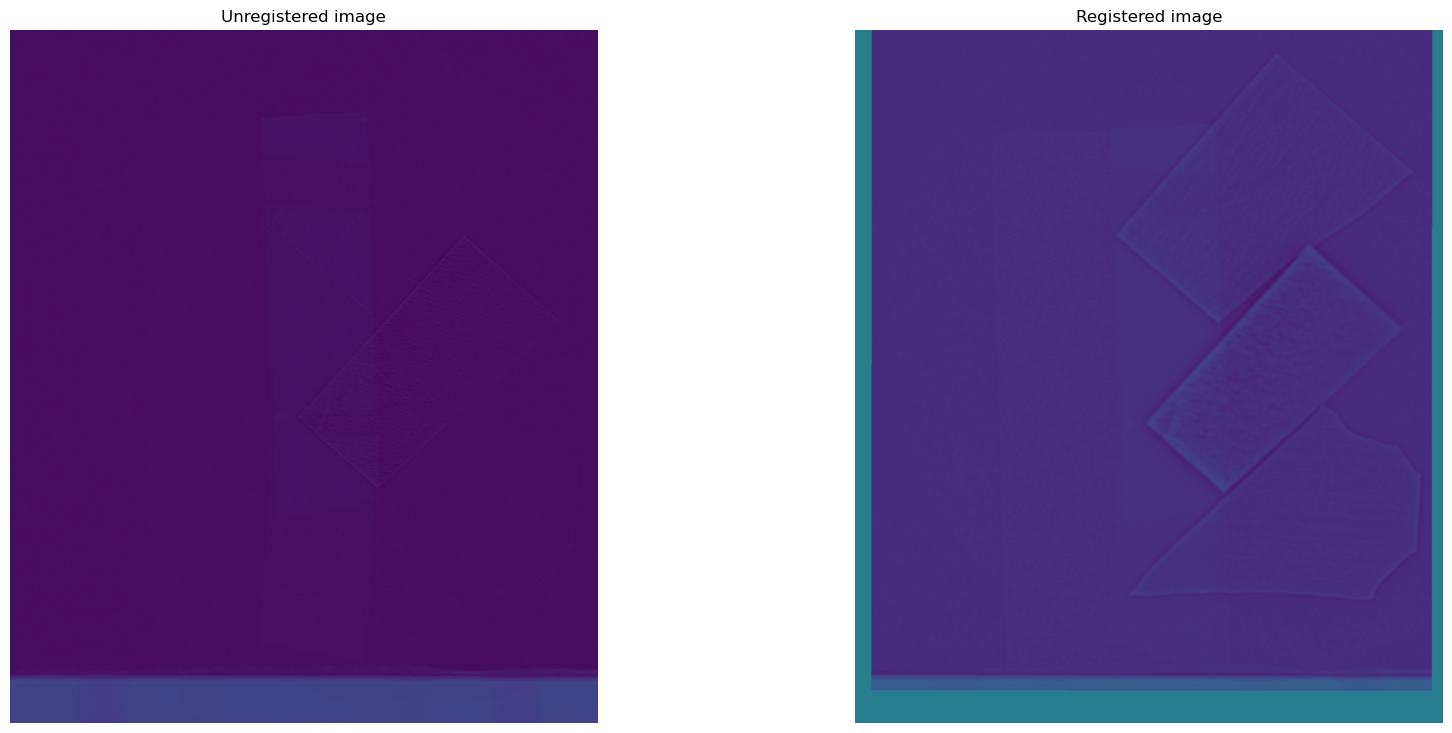

In [77]:
img_idx = -1
img_name = name_pattern[3]
#########################
f, ax = plt.subplots(1, 2, figsize=(20, 9))
check_reg =  rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(reg_dict[img_name][0], vmax=3)
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], vmax=3)
ax[1].set_title('Registered image')
ax[1].axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


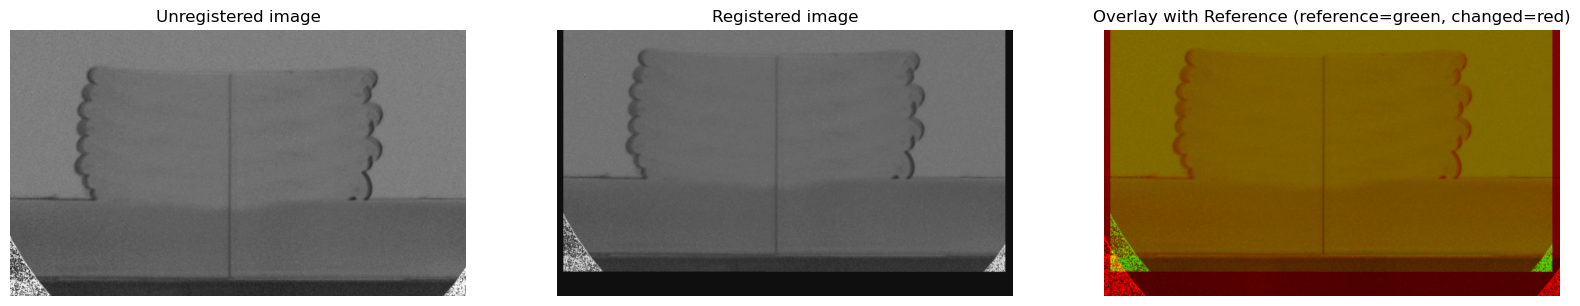

In [14]:
img_idx = -1
img_name = name_pattern[1]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg = rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');